<a href="https://colab.research.google.com/github/21IRV/IS170/blob/main/hw4_Del_Rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import and clean data

In [ ]:
# call the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#load the data
df=pd.read_csv("/content/ign_scores.csv")
df.head()

,Platform,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
0,Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
1,Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000
2,Game Boy Color,6.272727,8.166667,5.307692,4.500000,6.352941,6.583333,7.285714,5.897436,4.500000,5.900000,5.790698,7.400000
3,GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
4,Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000


In [ ]:
df.dropna(inplace=True)
df.shape

(21, 13)

with this data i am going to attempt to identify means through cluster points in "Racing" and "Shooter" catergories. 

Text(0, 0.5, 'shooters by console')

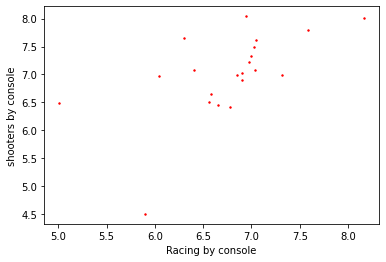

In [ ]:
plt.scatter(df['Racing'],df['Shooter'],c='red', s=2) 
plt.xlabel("Racing by console")
plt.ylabel("shooters by console")

In [ ]:
#For now, we'll try k value 2
k=3
X=np.array(list(zip(df['Racing'], df['Shooter'])))
model=KMeans(n_clusters=k)
kmeans=model.fit(X)
labels=model.predict(X)
centroids=model.cluster_centers_

print(labels)
print(centroids)

[2 0 1 0 0 2 0 0 0 0 0 0 2 0 2 1 0 2 2 2 0]
[[6.7497953  6.85569431]
 [5.45455128 5.48989899]
 [7.15050054 7.70964822]]


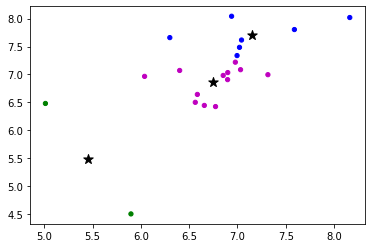

In [ ]:
#Plot the data and centroids on a scatter plot
#map the labels to colors

c=['m','g','b','r','y','c']
colors=[c[i] for i in labels]

plt.scatter(df['Racing'],df['Shooter'],c=colors, s=18)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')

In [ ]:
#Using the model that you have just trained,  
#you can use it to predict what cluster for any point 

#making preductions
cluster=model.predict([[7,7]])[0]
print(c[cluster]) 

cluster=model.predict([[6.5,6]])[0]
print(c[cluster]) 

cluster=model.predict([[8,8]])[0]
print(c[cluster])

m
m
b


In [ ]:
#obtaining the silhouette coefficient(score)
from sklearn.metrics import silhouette_score

model=KMeans(n_clusters=2)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=3):  {silhouette_score(X,label)}')

silhouette Score (n=3):  0.5975185188666797
